#gym-anytrading
AnyTrading is a collection of OpenAI Gym environments for reinforcement learning-based trading algorithms.

Trading algorithms are mostly implemented in two markets: FOREX and Stock. AnyTrading aims to provide some Gym environments to improve and facilitate the procedure of developing and testing RL-based algorithms in this area. This purpose is obtained by implementing three Gym environments: TradingEnv, ForexEnv, and StocksEnv.

#Installation

In [1]:
!pip install gym-anytrading


     |████████████████████████████████| 171 kB 5.0 MB/s 


#Environemnt Properties
## **Trading Actions: "Buy, Sell, Hold, Exit etc."**

Final Choices: Sell=0 and Buy=1


## **Traiding Positions: "Short, Long, Flat, etc."**
Final Choices: Short=0 and Long=1

##**Trading Environments:**
### **1-)Traidng Env. :**

TradingEnv is an abstract class which inherits gym.Env.

###**2-)Forex Env. :**
Class which inherits TradingEnv and implements its abstract methods. Also, it has some specific properties for the FOREX market.


###**3-)Stocks Env. :**
Same as ForexEnv but for the Stock market. 

#Examples
###Create Environemnt

In [2]:
import gym
import gym_anytrading

env = gym.make('forex-v0')
# env = gym.make('stocks-v0')

There is two options of ENV, these ara forex and stocks. They created with name from source code.  But they are customizable. 

###Create an environment with custom parameters


In [3]:
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL

custom_env = gym.make('forex-v0',
               df = FOREX_EURUSD_1H_ASK,
               window_size = 10,
               frame_bound = (10, 300),
               unit_side = 'right')

# custom_env = gym.make('stocks-v0',
#                df = STOCKS_GOOGL,
#                window_size = 10,
#                frame_bound = (10, 300))

In customize part, there is important metric that "data". We shoul give df to make() function. These csv datasets look like below:
--------------------------------------------------------------------------------
###FOREX_EURUSD_1H_ASK

Time,	Open,	High,	Low,	Close,	Volume
* 01.01.2017 22:00:00.000	1.05236	1.05253	1.05221	1.05227	143539993.3
* 01.01.2017 23:00:00.000	1.05227	1.05426	1.05226	1.05282	253139999.4
* 02.01.2017 00:00:00.000	1.05283	1.05283	1.05268	1.05281	131399993.9
* 02.01.2017 01:00:00.000	1.05282	1.05286	1.05225	1.0524	273940002.4
--------------------------------------------------------------------------------
###STOCKS_GOOGL

 Date,	Open,	High,	Low,	Close,	Adj Close,	Volume
* 2009-05-22	198.528534	199.524521	196.196198	196.946945	196.946945	3433700
* 2009-05-26	196.171173	202.702698	195.195190	202.382385	202.382385	6202700
* 2009-05-27	203.023026	206.136139	202.607605	202.982986	202.982986	6062500
* 2009-05-28	204.544540	206.016022	202.507507	205.405411	205.405411	5332200
--------------------------------------------------------------------------------

In [ ]:
In customize part, there is important metric that "data". We shoul give df to make() function. These csv datasets look like below:
--------------------------------------------------------------------------------
###FOREX_EURUSD_1H_ASK

Time	Open	High	Low	Close	Volume
01.01.2017 22:00:00.000	1.05236	1.05253	1.05221	1.05227	143539993.3
01.01.2017 23:00:00.000	1.05227	1.05426	1.05226	1.05282	253139999.4
02.01.2017 00:00:00.000	1.05283	1.05283	1.05268	1.05281	131399993.9
02.01.2017 01:00:00.000	1.05282	1.05286	1.05225	1.0524	273940002.4
--------------------------------------------------------------------------------
###STOCKS_GOOGL

 Date	Open	High	Low	Close	Adj Close	Volume
2009-05-22	198.528534	199.524521	196.196198	196.946945	196.946945	3433700
2009-05-26	196.171173	202.702698	195.195190	202.382385	202.382385	6202700
2009-05-27	203.023026	206.136139	202.607605	202.982986	202.982986	6062500
2009-05-28	204.544540	206.016022	202.507507	205.405411	205.405411	5332200
--------------------------------------------------------------------------------

###Print Information

In [4]:
print("env information:")
print("> shape:", env.shape)
print("> df.shape:", env.df.shape)
print("> prices.shape:", env.prices.shape)
print("> signal_features.shape:", env.signal_features.shape)
print("> max_possible_profit:", env.max_possible_profit())

print()
print("custom_env information:")
print("> shape:", custom_env.shape)
print("> df.shape:", env.df.shape)
print("> prices.shape:", custom_env.prices.shape)
print("> signal_features.shape:", custom_env.signal_features.shape)
print("> max_possible_profit:", custom_env.max_possible_profit())

env information:
> shape: (24, 2)
> df.shape: (6225, 5)
> prices.shape: (6225,)
> signal_features.shape: (6225, 2)
> max_possible_profit: 4.054414887146586

custom_env information:
> shape: (10, 2)
> df.shape: (6225, 5)
> prices.shape: (300,)
> signal_features.shape: (300, 2)
> max_possible_profit: 1.122900180008982


###Plot Environment

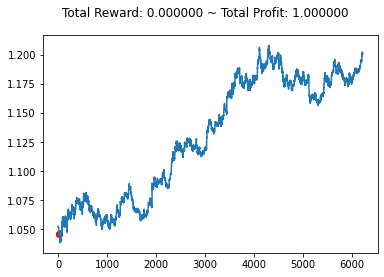

In [5]:
env.reset()
env.render()

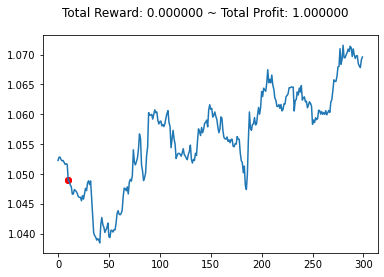

In [9]:
custom_env.reset()
custom_env.render()

#A complete example
#Same code with forex ENV

info: {'total_reward': 81.70000000000677, 'total_profit': 0.9920321214230738, 'position': 0}


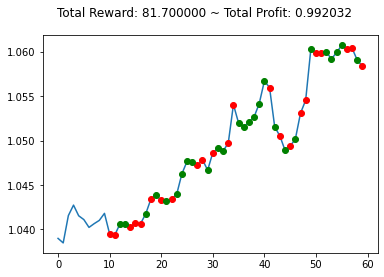

In [11]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt

env = gym.make('forex-v0', frame_bound=(50, 100), window_size=10)
# env = gym.make('stocks-v0', frame_bound=(50, 100), window_size=10)

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

#Same code with Stocks ENV

info: {'total_reward': 31.021040000000056, 'total_profit': 0.9765015877837985, 'position': 1}


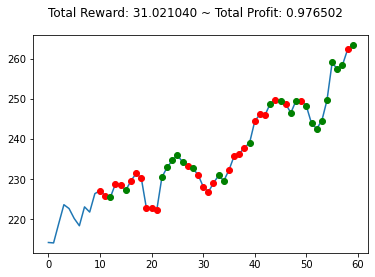

In [12]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt

env = gym.make('stocks-v0', frame_bound=(50, 100), window_size=10)

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

#Extend and manipulate TradingEnv
###Method 1 (Recommended):



In [7]:
def my_process_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'Open', 'High', 'Low']].to_numpy()[start:end]
    return prices, signal_features


class MyForexEnv(ForexEnv):
    _process_data = my_process_data


env = MyForexEnv(df=FOREX_EURUSD_1H_ASK, window_size=12, frame_bound=(12, len(FOREX_EURUSD_1H_ASK)))

###Method 2:



In [8]:
def my_process_data(df, window_size, frame_bound):
    start = frame_bound[0] - window_size
    end = frame_bound[1]
    prices = df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = df.loc[:, ['Close', 'Open', 'High', 'Low']].to_numpy()[start:end]
    return prices, signal_features


class MyStocksEnv(StocksEnv):
    
    def __init__(self, prices, signal_features, **kwargs):
        self._prices = prices
        self._signal_features = signal_features
        super().__init__(**kwargs)

    def _process_data(self):
        return self._prices, self._signal_features

    
prices, signal_features = my_process_data(df=STOCKS_GOOGL, window_size=30, frame_bound=(30, len(STOCKS_GOOGL)))
env = MyStocksEnv(prices, signal_features, df=STOCKS_GOOGL, window_size=30, frame_bound=(30, len(STOCKS_GOOGL)))

In [13]:
print(prices)

[ 196.196198  195.19519   202.607605 ... 1240.680054 1242.969971
 1252.800049]


In [14]:
print(signal_features)


[[ 196.946945  198.528534  199.524521  196.196198]
 [ 202.382385  196.171173  202.702698  195.19519 ]
 [ 202.982986  203.023026  206.136139  202.607605]
 ...
 [1256.27002  1244.140015 1257.869995 1240.680054]
 [1245.859985 1255.900024 1256.560059 1242.969971]
 [1264.650024 1255.       1267.170044 1252.800049]]
